In [ ]:
pip install pydub

In [ ]:
import soundfile as sf
import numpy as np
from pydub import AudioSegment
import time
import scipy
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import wave
import sys
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [ ]:
#SNR ratio function##################

def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

In [ ]:
#Plotting function ########################################

# def plotaudio(file):
#     spf = wave.open(file, 'r')

#     # Extract Raw Audio from Wav File
#     signal = spf.readframes(-1)
#     signal = np.frombuffer(signal, np.int16)

#     # If Stereo
#     if spf.getnchannels() == 2:
#         print('Just mono files')
#         sys.exit(0)

#     # Create a time array for the x-axis
#     time = np.linspace(0, len(signal) / spf.getframerate(), num=len(signal))

#     # Create a figure and a 3D axes
#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')

#     if file == "inputfile.wav":
#         ax.set_title('Input Wave')
#     elif file == "noise.wav":
#         ax.set_title('Noise wave')
#     elif file == "combine.wav":
#         ax.set_title('Combined sound Wave')
#     elif file == "outputfile.wav":
#         ax.set_title('Output Wave')

#     # Plot the signal in 3D
#     ax.plot(time, signal, zs=0, zdir='y')

#     # Label axes
#     ax.set_xlabel('Time (s)')
#     ax.set_ylabel('Amplitude')
#     ax.set_zlabel('Value')

#     plt.show()
# Define a list of colors
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

def plotaudio(file, color):
    spf = wave.open(file, 'r')

    # Extract Raw Audio from Wav File
    signal = spf.readframes(-1)
    signal = np.frombuffer(signal, np.int16)

    # If Stereo
    if spf.getnchannels() == 2:
        print('Just mono files')
        sys.exit(0)

    # Create a time array for the x-axis
    time = np.linspace(0, len(signal) / spf.getframerate(), num=len(signal))

    # Create a figure and a 3D axes
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    if file == "inputfile.wav":
        ax.set_title('Input Wave')
    elif file == "noise.wav":
        ax.set_title('Noise wave')
    elif file == "combine.wav":
        ax.set_title('Combined sound Wave')
    elif file == "outputfile.wav":
        ax.set_title('Output Wave')

    # Plot the signal in 3D with the specified color
    ax.plot(time, signal, zs=0, zdir='y', color=color)

    # Label axes
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude')
    ax.set_zlabel('Value')

    plt.show()

In [ ]:
# Define the input and output file paths
input_file = "pim.wav"
output_file = "inputfile.wav"

# Load the input audio file
audio = AudioSegment.from_wav(input_file)

# Ensure the audio is in mono (if it's stereo)
if audio.channels == 2:
    audio = audio.set_channels(1)

# Set the target sample rate (44100 Hz)
target_sample_rate = 44100

# Convert the audio to the target sample rate
audio = audio.set_frame_rate(target_sample_rate)

# Export the converted audio to the output file
audio.export(output_file, format="wav")


<_io.BufferedRandom name='inputfile.wav'>

(122132,) 44100


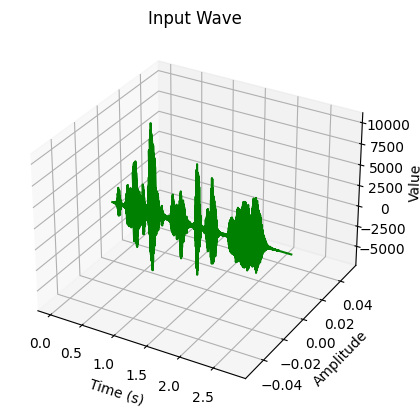

(441001,) 44100


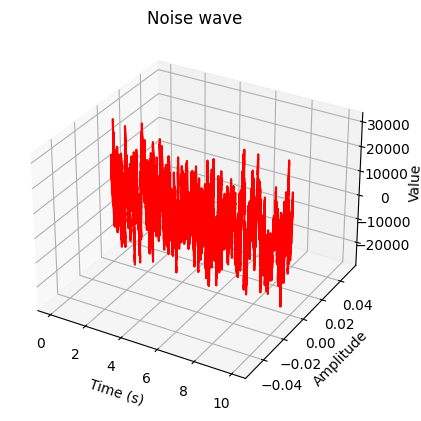

In [ ]:
data1, samplerate1=sf.read('inputfile.wav')

print(data1.shape,samplerate1)


plotaudio('inputfile.wav',color='g')


data2, samplerate2=sf.read('noise.wav')

print(data2.shape, samplerate2)

plotaudio('noise.wav',color='r')


(122112,) 44100


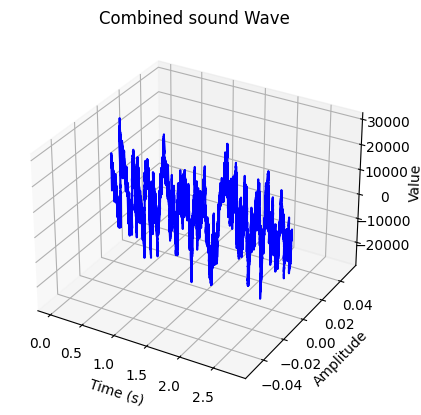

0.16508070336260564


In [ ]:
#Merging noise and data  ############################################################################

sound1=AudioSegment.from_file('inputfile.wav')
sound2=AudioSegment.from_file('noise.wav')

combined=sound1.overlay(sound2)

combined.export('combine.wav', format='wav')

data3, samplerate3 = sf.read('combine.wav')

print(data3.shape, samplerate3)

plotaudio("combine.wav", color='b')

print(signaltonoise(data3))

In [ ]:
#Initialize weights randomly  ########################################################################

np.random.seed(1)

WEIGHTS = np.random.random((2,1))-1

print( "Random Weights before training", WEIGHTS)
output_data=[]



#Activation Functions
def linearfunc(x):
    if (x >= 0):
        return x
    else:
        return 0.01*x

learning_rate=0.1




#Learning Process - Training Data

for iter in range(50):

    for originalvalue,noisedata, combined in zip(data1,data2,data3):

        ada_output=(combined*WEIGHTS[0])+(noisedata*WEIGHTS[1])

        ada_output=linearfunc(ada_output)

        error_value=originalvalue-ada_output

        # Delta Rule Implementation

        WEIGHTS[0]=WEIGHTS[0]+learning_rate*error_value*combined
        WEIGHTS[1] = WEIGHTS[1] + learning_rate * error_value * noisedata

    print("--- epoch %s---"%iter)

    print("Weights  ", WEIGHTS)

Random Weights before training [[-0.582978  ]
 [-0.27967551]]
--- epoch 0---
Weights   [[ 2.45597974]
 [-2.45597901]]
--- epoch 1---
Weights   [[ 2.77652794]
 [-2.77652722]]
--- epoch 2---
Weights   [[ 2.8152727 ]
 [-2.81527197]]
--- epoch 3---
Weights   [[ 2.81995637]
 [-2.81995564]]
--- epoch 4---
Weights   [[ 2.8205226 ]
 [-2.82052187]]
--- epoch 5---
Weights   [[ 2.82059105]
 [-2.82059033]]
--- epoch 6---
Weights   [[ 2.82059933]
 [-2.82059861]]
--- epoch 7---
Weights   [[ 2.82060033]
 [-2.82059961]]
--- epoch 8---
Weights   [[ 2.82060045]
 [-2.82059973]]
--- epoch 9---
Weights   [[ 2.82060047]
 [-2.82059974]]
--- epoch 10---
Weights   [[ 2.82060047]
 [-2.82059974]]
--- epoch 11---
Weights   [[ 2.82060047]
 [-2.82059974]]
--- epoch 12---
Weights   [[ 2.82060047]
 [-2.82059974]]
--- epoch 13---
Weights   [[ 2.82060047]
 [-2.82059974]]
--- epoch 14---
Weights   [[ 2.82060047]
 [-2.82059974]]
--- epoch 15---
Weights   [[ 2.82060047]
 [-2.82059974]]
--- epoch 16---
Weights   [[ 2.82060

(122112, 1)
SNR [-0.00167835]


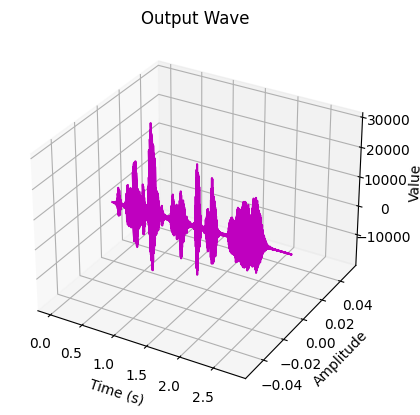

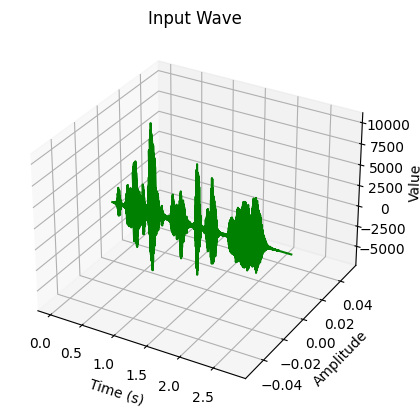

In [ ]:
#Appending Output data  ####################################

for noisedata, combined in zip(data2, data3):
    finaloutput=(combined*WEIGHTS[0])+(noisedata*WEIGHTS[1])
    output_data.append(finaloutput)


output_data=np.asarray(output_data)

print(output_data.shape)

print("SNR", signaltonoise(output_data))

#Writing the sound output

sf.write('outputfile.wav', output_data,samplerate1)

plotaudio("outputfile.wav", color='m')

plotaudio('inputfile.wav', color='g')

(122132,) 44100


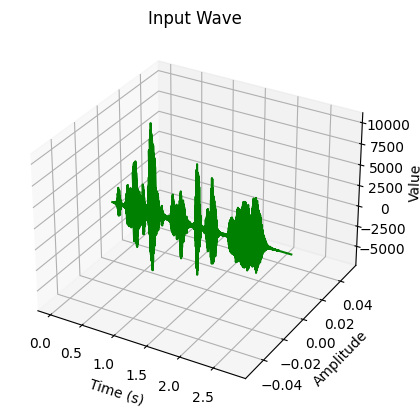

(441001,) 44100


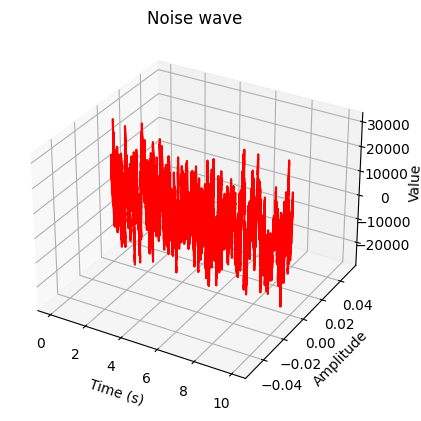

(122112,) 44100


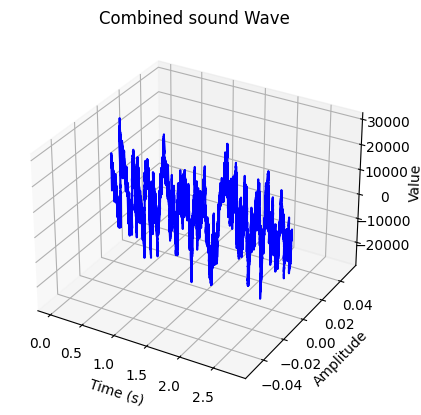

0.16508070336260564
Random Weights before training [[-0.582978  ]
 [-0.27967551]]


In [ ]:
#Extracting array from audio file,  ################################################################

data1, samplerate1=sf.read('inputfile.wav')

print(data1.shape,samplerate1)

plotaudio('inputfile.wav', color='g')


data2, samplerate2=sf.read('noise.wav')

print(data2.shape, samplerate2)

plotaudio('noise.wav', color='r')

#Merging noise and data  ############################################################################

sound1=AudioSegment.from_file('inputfile.wav')
sound2=AudioSegment.from_file('noise.wav')

combined=sound1.overlay(sound2)

combined.export('combine.wav', format='wav')

data3, samplerate3 = sf.read('combine.wav')

print(data3.shape, samplerate3)

plotaudio("combine.wav", color='b')

print(signaltonoise(data3))

#Initialize weights randomly  ########################################################################

np.random.seed(1)

WEIGHTS = np.random.random((2,1))-1

# data4=np.random.normal(0,0.1, data1.shape[0])
#
# sf.write('gaussiannoise.wav', data4, samplerate1)
#
# sound3=AudioSegment.from_file('inputfile.wav')
# sound4=AudioSegment.from_file('gaussiannoise.wav')
#
# combinedgau=sound3.overlay(sound4)
#
# combinedgau.export('combinegau.wav', format='wav')
#
# data5, samplerate5 = sf.read('combinegau.wav')

print( "Random Weights before training", WEIGHTS)

output_data=[]


In [ ]:
#On new data ##############################################

sound1=AudioSegment.from_file('newinput.wav')
sound2=AudioSegment.from_file('noise.wav')

combined=sound1.overlay(sound2)

combined.export('newcombine.wav', format='wav')

data4, samplerate3 = sf.read('newcombine.wav')

print(data4.shape, samplerate3)

newoutputaudio=[]

for noisedata, combined in zip(data2, data4):

    finaloutput=(combined*WEIGHTS[0])+(noisedata*WEIGHTS[1])

    newoutputaudio.append(finaloutput)

newoutputaudio=np.asarray(newoutputaudio)

sf.write('newoutputfile.wav', newoutputaudio,samplerate1)
# print("--- %s seconds ---" % (time.time() - start_time))

(156334,) 44100


In [ ]:
#The End And the Beginning

#Combined(Blue)  = Input(Green) + Noise(Red)
#Output(Magenta) = Extracted Input(Green)